Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1946
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1652 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0783 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0197 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0132 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6881e-04 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5329e-04 
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3102e-04 
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5826e-04 
Epoch 16/20
5/5 ━━━

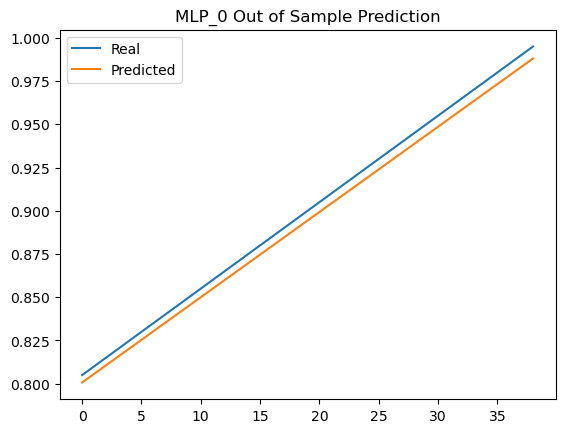

R2 =  0.9895464012927995
MAE =  0.005617593496273742
MSE =  3.218075514281556e-05
MAPE =  0.006250144320534333
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


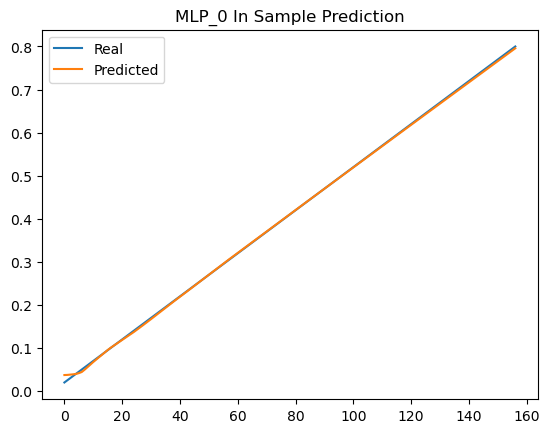

In [74]:
# Task 3.1.1.
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Input
from keras.models import Sequential

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#define an MLP model to be trained
def create_MLP(input_train, output_train, window_size, num_layers = 1, epochs = 1):

    num_neurons = 64
    activator_function = 'relu'

    # Create MLP model
    model = Sequential()
    model.add(Input((window_size,)))    # Input layer
    
    # Create hidden layers
    for i in range(num_layers):
        model.add(Dense(num_neurons, activation=activator_function))    #   Hidden Layers

    model.add(Dense(1))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model


def split_data(series, input_window, output_window, training_percent):

    input_seq = []
    output_seq = []

    # Separate series into input and output series based onrequired steps
    for i in range(len(series) - input_window - output_window + 1):
        input_seq.append(series[i:i + input_window])
        output_seq.append(series[i + input_window:i + input_window + output_window])

    input_seq = np.array(input_seq)
    output_seq = np.array(output_seq)

    # Split data into 80% for training, 20% for predication
    split_index = round(len(input_seq)*training_percent)
    # training data
    input_train = input_seq[:split_index]
    output_train = output_seq[:split_index]
    # testing data
    input_predict = input_seq[split_index:]
    output_predict = output_seq[split_index:]

    return [input_train, output_train], [input_predict, output_predict]

# Task 3.1.1.1
# Creat an array of 200 steps from 0 to 1
num_points = 200
# Create the equal-difference series
series = np.linspace(0, 1, num_points, endpoint=False)

# Split data as required
train_series, test_series = split_data(series, 4, 1, 0.8)

# Create MLP
MLP_0 = create_MLP(train_series[0], train_series[1], 4, 10, 20)

# Predict out of sample values
MLP_0_Output_Predict = MLP_0.predict(test_series[0])

plt.figure()
plt.title("MLP_0 Out of Sample Prediction")
plt.savefig('plots/MLP_0_OutSample.png')
plt.plot(test_series[1],label='Real')
plt.plot(MLP_0_Output_Predict, label='Predicted')
plt.legend()
plt.show()

print('R2 = ', r2_score(MLP_0_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_0_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_0_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_0_Output_Predict, test_series[1]))

# Predict in sample values
MLP_0_Output_Predict = MLP_0.predict(train_series[0])

plt.figure()
plt.title("MLP_0 In Sample Prediction")
plt.savefig('plots/MLP_0_InSample.png')
plt.plot(train_series[1],label='Real')
plt.plot(MLP_0_Output_Predict, label='Predicted')
plt.legend()
plt.show()




Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2238
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1521 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0335 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0290 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011     
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.2541e-04 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8854e-04 
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8287e-04 
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2663e-04 
Epoch 16/20
5/5

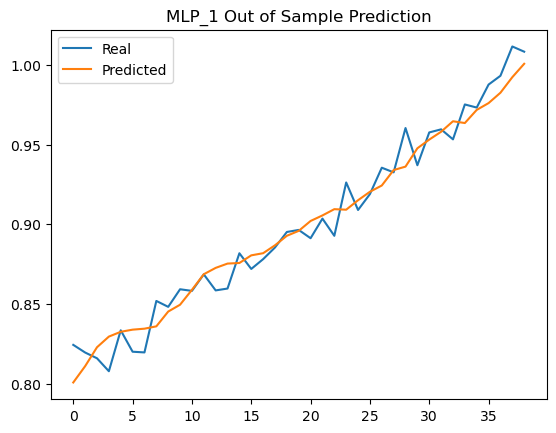

R2 =  0.9559517643380756
MAE =  0.00907319077553254
MSE =  0.0001289890594001551
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


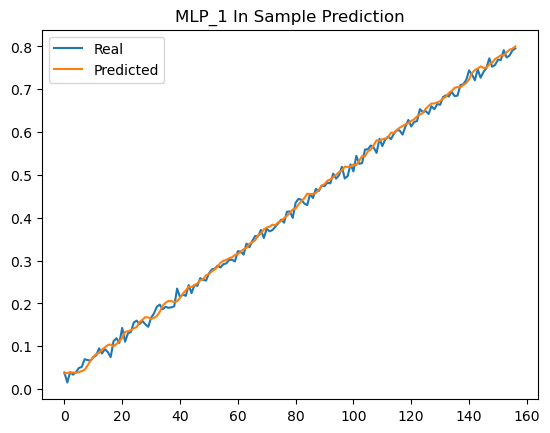

In [3]:
# Task 3.1.1.2
# Creat an array of 200 steps from 0 to 1 with noise
np.random.seed(0)  # for reproducibility
noise = np.random.normal(0, 1, num_points)  # random noise
series_noise = series + 0.01*noise

# Split data as required
train_series, test_series = split_data(series_noise, 4, 1, 0.8)

# Create MLP
MLP_1 = create_MLP(train_series[0], train_series[1], 4, 15, 20)

# Predict out of sample values
MLP_1_Output_Predict = MLP_1.predict(test_series[0])

plt.figure()
plt.title("MLP_1 Out of Sample Prediction")
plt.savefig('plots/MLP_1_OutSample.png')
plt.plot(test_series[1],label='Real')
plt.plot(MLP_1_Output_Predict, label='Predicted')
plt.legend()
plt.show()

print('R2 = ', r2_score(MLP_1_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_1_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_1_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_1_Output_Predict, test_series[1]))

# Predict in sample values
MLP_1_Output_Predict = MLP_1.predict(train_series[0])

plt.figure()
plt.title("MLP_1 In Sample Prediction")
plt.savefig('plots/MLP_1_InSample.png')
plt.plot(train_series[1],label='Real')
plt.plot(MLP_1_Output_Predict, label='Predicted')
plt.legend()
plt.show()

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0508
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


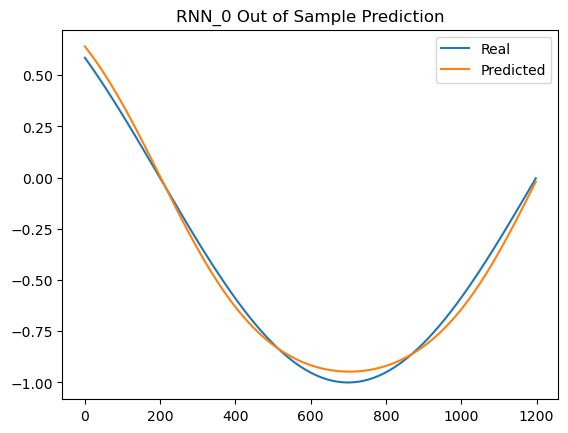

R2 =  0.9953335821141989
MAE =  0.02587180448929556
MSE =  0.0009798518761423246
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


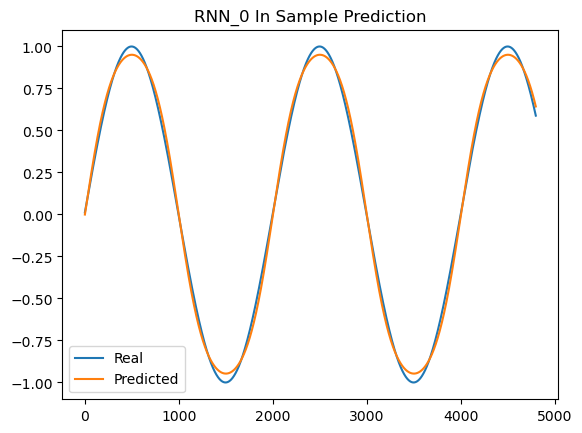

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1920
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


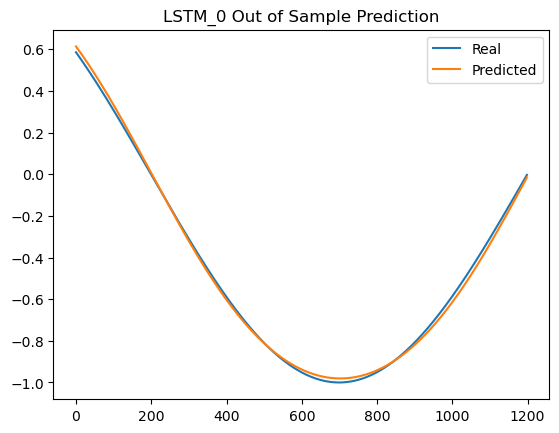

R2 =  0.9985471008699633
MAE =  0.014925070337920489
MSE =  0.0003050400920989646
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


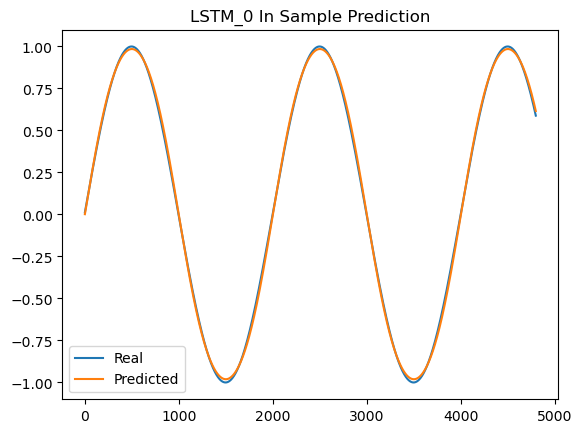

In [4]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM


def generate_sine_wave(freq, amplitude, duration, sampling_rate, noise_level):
    """
    Generate a sine wave.

    Parameters:
        freq (float): Frequency of the sine wave in Hz.
        amplitude (float): Amplitude of the sine wave.
        duration (float): Duration of the sine wave in seconds.
        sampling_rate (int): Sampling rate (number of samples per second).

    Returns:
        numpy.ndarray: The generated sine wave.
    """
    num_samples = int(duration * sampling_rate)
    time = np.linspace(0, duration, num_samples)
    noise = np.random.uniform(-noise_level, noise_level, num_samples)
    sine_wave = amplitude * np.sin(2 * np.pi * freq * time) + noise
    return [sine_wave,time]


#define an RNN model to be trained
def create_RNN(input_train, output_train, window_size_in, window_size_out, epochs = 1):

    num_neurons = 64

    # Create RNN model
    model = Sequential()
    model.add(SimpleRNN(num_neurons,input_shape=(window_size_in,1)))    # Input layer
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(window_size_out))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model


#define an LSTM model to be trained
def create_LSTM(input_train, output_train, window_size_in, window_size_out, epochs = 1):

    num_neurons = 64

    # Create LSTM model
    model = Sequential()
    model.add(LSTM(num_neurons,input_shape=(window_size_in,1)))    # Input layer
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(window_size_out))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model

# Task 3.1.1.2
# Sine wave Parameters
frequency = 1/20  # Hz
amplitude = 1.0
duration = 60.0  # seconds
sampling_rate = 100  # Hz

# Generate sine wave
[sine_wave, time] = generate_sine_wave(frequency, amplitude, duration, sampling_rate, 0)

# Split data as required
train_series, test_series = split_data(sine_wave, 4, 2, 0.8)

# Re-shape input data for RNN and LSTM
train_series[0] = train_series[0].reshape(-1, 4, 1)
test_series[0] = test_series[0].reshape(-1, 4, 1)

# Create RNN
RNN_0 = create_RNN(train_series[0], train_series[1], 4, 2)

# Predict out of sample values
RNN_0_Output_Predict = RNN_0.predict(test_series[0])

plt.figure()
plt.savefig('plots/RNN_0_OutSample.png')
plt.title("RNN_0 Out of Sample Prediction")
plt.plot(test_series[1][:,0],label='Real')
plt.plot(RNN_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

print('R2 = ', r2_score(RNN_0_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_0_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_0_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_0_Output_Predict, test_series[1]))


# Predict in sample values
RNN_0_Output_Predict = RNN_0.predict(train_series[0])

plt.figure()
plt.savefig('plots/RNN_0_InSample.png')
plt.title("RNN_0 In Sample Prediction")
plt.plot(train_series[1][:,0],label='Real')
plt.plot(RNN_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

# Create LSTM
LSTM_0 = create_LSTM(train_series[0], train_series[1], 4, 2, )

# Predict out of sample values
LSTM_0_Output_Predict = LSTM_0.predict(test_series[0])

plt.figure()
plt.savefig('plots/LSTM_0_OutSample.png')
plt.title("LSTM_0 Out of Sample Prediction")
plt.plot(test_series[1][:,0], label='Real')
plt.plot(LSTM_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

print('R2 = ', r2_score(LSTM_0_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_0_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_0_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_0_Output_Predict, test_series[1]))


# Predict in sample values
LSTM_0_Output_Predict = LSTM_0.predict(train_series[0])

plt.figure()
plt.savefig('plots/LSTM_0_InSample.png')
plt.title("LSTM_0 In Sample Prediction")
plt.plot(train_series[1][:,0], label='Real')
plt.plot(LSTM_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()


Epoch 1/10


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1562
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1015
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1041
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1028
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1021
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1007
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1033
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1021
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1016
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1006
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


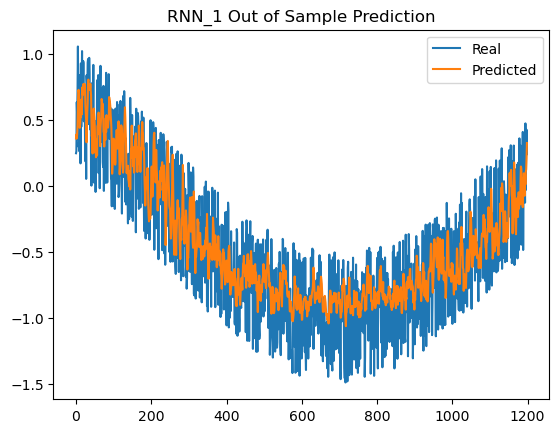

R2 =  0.5058218674251082
MAE =  0.26900844148174324
MSE =  0.10333509067549446
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


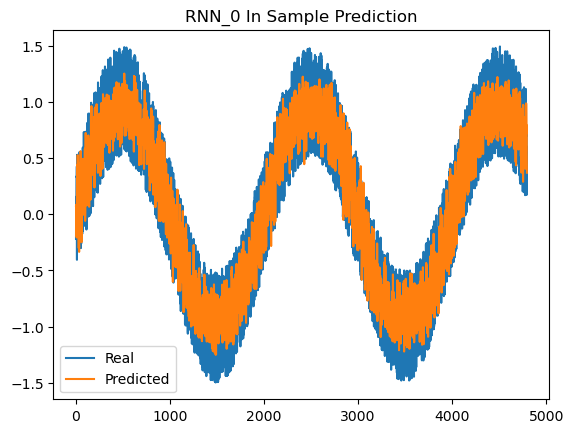

Epoch 1/10


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2313
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1040
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1032
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1054
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1027
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1024
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1029
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0998
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1011
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1013
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


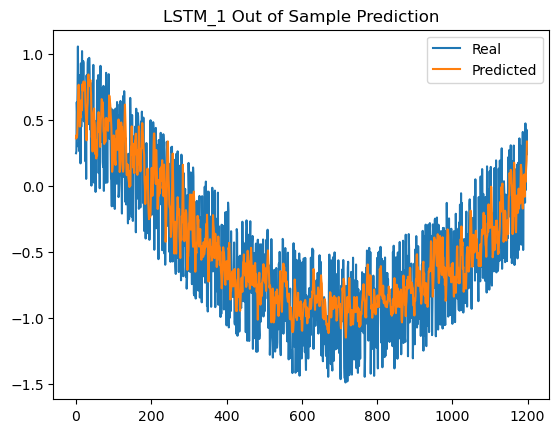

R2 =  0.5031777062065519
MAE =  0.2701756687485258
MSE =  0.10429170422207959
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


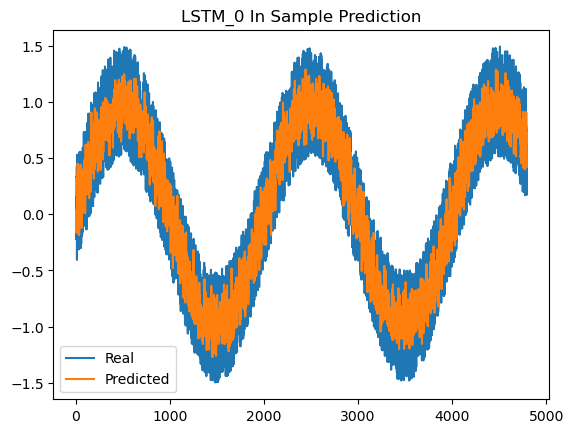

In [5]:

noise_level = 0.5   # noise

# Generate noisy sine wave
[sine_wave_noise, time] = generate_sine_wave(frequency, amplitude, duration, sampling_rate, noise_level)

# Split data as required
train_series, test_series = split_data(sine_wave_noise, 4, 2, 0.8)

# Re-shape input data for RNN and LSTM
train_series[0] = train_series[0].reshape(-1, 4, 1)
test_series[0] = test_series[0].reshape(-1, 4, 1)

# Create RNN
RNN_1 = create_RNN(train_series[0], train_series[1], 4, 2, 10)

# Predict output values
RNN_1_Output_Predict = RNN_1.predict(test_series[0])

plt.figure()
plt.savefig('plots/RNN_1_OutSample.png')
plt.title("RNN_1 Out of Sample Prediction")
plt.plot(test_series[1][:,0],label='Real')
plt.plot(RNN_1_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

print('R2 = ', r2_score(RNN_1_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_1_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_1_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_1_Output_Predict, test_series[1]))

# Predict in sample values
RNN_0_Output_Predict = RNN_0.predict(train_series[0])

plt.figure()
plt.savefig('plots/RNN_0_InSample.png')
plt.title("RNN_0 In Sample Prediction")
plt.plot(train_series[1][:,0],label='Real')
plt.plot(RNN_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

# Create LSTM
LSTM_1 = create_LSTM(train_series[0], train_series[1], 4, 2, 10)

# Predict out of sample values
LSTM_1_Output_Predict = LSTM_1.predict(test_series[0])

plt.figure()
plt.savefig('plots/LSTM_1_OutSample.png')
plt.title("LSTM_1 Out of Sample Prediction")
plt.plot(test_series[1][:,0],label='Real')
plt.plot(LSTM_1_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

print('R2 = ', r2_score(LSTM_1_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_1_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_1_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_1_Output_Predict, test_series[1]))


# Predict In sample values
LSTM_0_Output_Predict = LSTM_0.predict(train_series[0])

plt.figure()
plt.savefig('plots/LSTM_0_InSample.png')
plt.title("LSTM_0 In Sample Prediction")
plt.plot(train_series[1][:,0], label='Real')
plt.plot(LSTM_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

In [6]:
from statsmodels.tsa.arima_process import ArmaProcess

# Task 3.1.2

# Pure white noise signal
length = 1000  # Length of the white noise series

# Generate white noise
white_noise = np.random.normal(0, 1, length)  # mean = 0, standard deviation = 1

# Random Walker seies
# Compute the random walk
random_walk = np.cumsum(white_noise)

#ARMA(2,2) model
# Define the parameters for the ARMA(2, 2) process
ar_params = np.array([1, -0.75, 0.25])  # AR coefficients (include 1 for the zero lag)
ma_params = np.array([1, 0.65, 0.35])   # MA coefficients (include 1 for the zero lag)

# Generate the ARMA(2, 2) process
arma_process = ArmaProcess(ar_params, ma_params)

# Generate the series
arma_series = arma_process.generate_sample(nsample=length)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.9784
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0083
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0627
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9365
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9509
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0033
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9608
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9147 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9525
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9222
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9521
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9365
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0020
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9324
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9505
Epo

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0738
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9548 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9365 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9205
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9752
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9830
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9844
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0356 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9860 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0341
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9792
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8945
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9555
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0271
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9336
Epoch 16/100

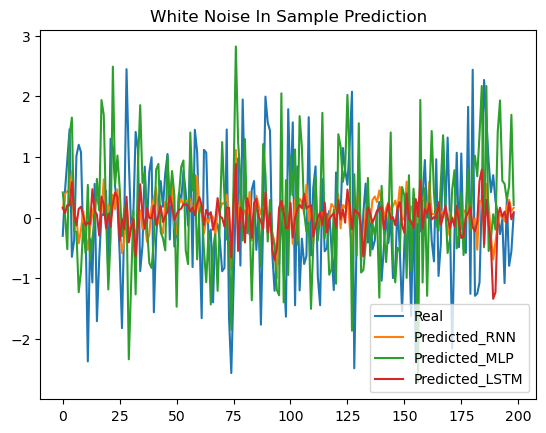

In [7]:
# Check different models for white noise

input_window = 5
epochs = 100
# Split data as required
train_series, test_series = split_data(white_noise, input_window, 1, 0.8)

# Create MLP
MLP_2 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_2_Output_Predict = MLP_2.predict(test_series[0])

# Create RNN
RNN_2 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_2_Output_Predict = RNN_2.predict(test_series[0])

# Create LSTM
LSTM_2 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_2_Output_Predict = LSTM_2.predict(test_series[0])

print("MLP")
print('R2 = ', r2_score(MLP_2_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_2_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_2_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_2_Output_Predict, test_series[1]))

print("RNN")
print('R2 = ', r2_score(RNN_2_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_2_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_2_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_2_Output_Predict, test_series[1]))

print("LSTM")
print('R2 = ', r2_score(LSTM_2_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_2_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_2_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_2_Output_Predict, test_series[1]))


plt.figure()
plt.savefig('plots/WhiteNoise_OutSample.png')
plt.title("White Noise In Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_2_Output_Predict, label='Predicted_RNN')
plt.plot(MLP_2_Output_Predict, label='Predicted_MLP')
plt.plot(LSTM_2_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 183.7976 
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.6069 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9221 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3794
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9676 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6272
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6309
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3700 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2257 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5463 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1018 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2207 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1829
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1692 
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 162.5460
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80.4220  
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.3189  
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.1062 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.7755 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.0775 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.2165 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.9300 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.0512 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1223 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7524 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7953 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1860 
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7036
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

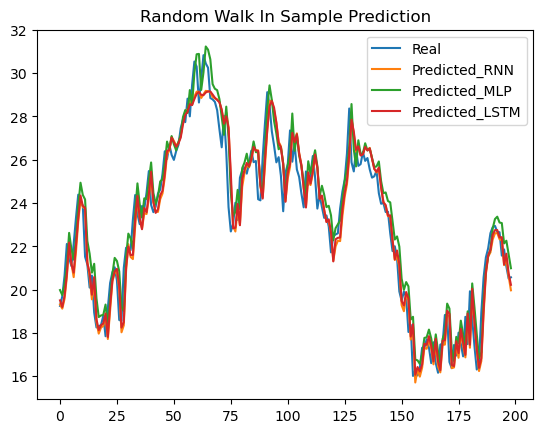

In [8]:
# Check different models for random_walk

input_window = 5
epochs = 100
# Split data as required
train_series, test_series = split_data(random_walk, input_window, 1, 0.8)

# Create MLP
MLP_3 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_3_Output_Predict = MLP_3.predict(test_series[0])

# Create RNN
RNN_3 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_3_Output_Predict = RNN_3.predict(test_series[0])

# Create LSTM
LSTM_3 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_3_Output_Predict = LSTM_3.predict(test_series[0])

print("MLP")
print('R2 = ', r2_score(MLP_3_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_3_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_3_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_3_Output_Predict, test_series[1]))

print("RNN")
print('R2 = ', r2_score(RNN_3_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_3_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_3_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_3_Output_Predict, test_series[1]))

print("LSTM")
print('R2 = ', r2_score(LSTM_3_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_3_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_3_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_3_Output_Predict, test_series[1]))

plt.figure()
plt.savefig('plots/RandomWalk_InSample.png')
plt.title("Random Walk In Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_3_Output_Predict, label='Predicted_RNN')
plt.plot(MLP_3_Output_Predict, label='Predicted_MLP')
plt.plot(LSTM_3_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 4.9673
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9888
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3039
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1988
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1033
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2069
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1528
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1440
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1451
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0706
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0651
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9624
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0398
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9428
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9622
Epoc

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.1989
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2805
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5445
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4041
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1903 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1455
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0347 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0681
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0170  
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0810
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0279
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9843
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0072 
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9918 
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0751
Epoch 16/1

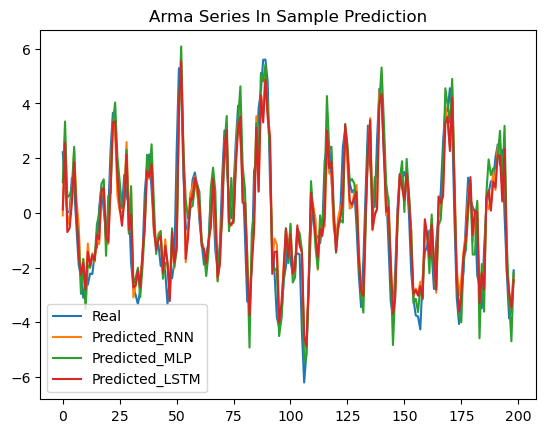

In [9]:
# Check different models for arma(2,2)

input_window = 5
epochs = 100
# Split data as required
train_series, test_series = split_data(arma_series, input_window, 1, 0.8)

# Create MLP
MLP_4 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_4_Output_Predict = MLP_4.predict(test_series[0])

# Create RNN
RNN_4 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_4_Output_Predict = RNN_4.predict(test_series[0])

# Create LSTM
LSTM_4 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_4_Output_Predict = LSTM_4.predict(test_series[0])

print("MLP")
print('R2 = ', r2_score(MLP_4_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_4_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_4_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_4_Output_Predict, test_series[1]))


print("RNN")
print('R2 = ', r2_score(RNN_4_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_4_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_4_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_4_Output_Predict, test_series[1]))


print("LSTM")
print('R2 = ', r2_score(LSTM_4_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_4_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_4_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_4_Output_Predict, test_series[1]))


plt.figure()
plt.savefig('plots/ArmaSeries_InSample.png')
plt.title("Arma Series In Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_4_Output_Predict, label='Predicted_RNN')
plt.plot(MLP_4_Output_Predict, label='Predicted_MLP')
plt.plot(LSTM_4_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.show()


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1340013690224640.0000
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 877051045216256.0000
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 870792338341888.0000  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1966851282173952.0000 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 828381146906624.0000 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 786195575472128.0000  
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 768778879107072.0000 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 716117546893312.0000 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 366580995194880.0000 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 86886919962624.0000   
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 504049543675904.0000
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79292880912384.0000 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1341265270538240.0000
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 884354100232192.0000  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 887211931205632.0000   
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 882922802380800.0000  
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 883158153166848.0000  
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2043897224101888.0000
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 895280094380032.0000  
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 895291704213504.0000  
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2056263642906624.0000
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1345563727495168.0000  
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1089406777688064.0000 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 956823351853056.0000  
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step -

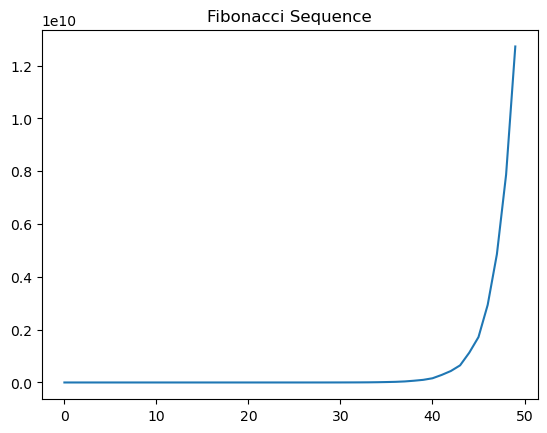

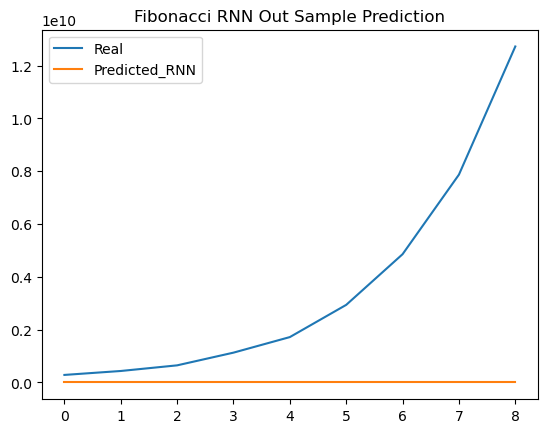

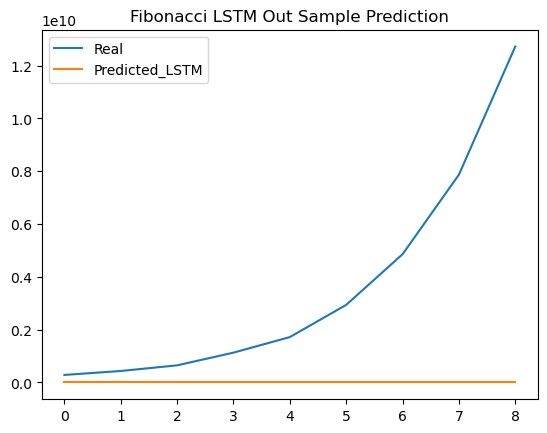

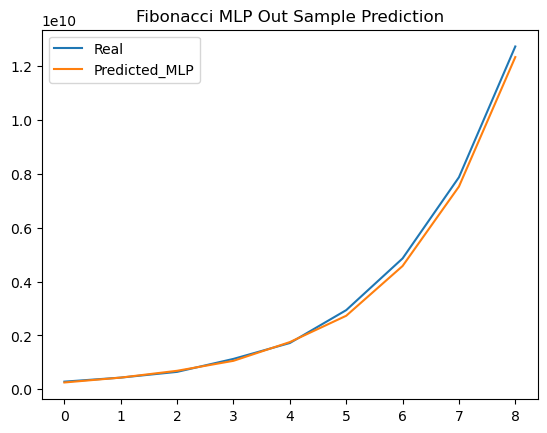

MLP
R2 =  0.9969452778978508
MAE =  156174370.0
MSE =  4.5049723e+16
MAPE =  0.05381913
RNN
R2 =  0.0
MAE =  3622786000.0
MSE =  2.8991527e+19
MAPE =  269851780.0
LSTM
R2 =  0.0
MAE =  3622786000.0
MSE =  2.8991527e+19
MAPE =  214768750.0


In [87]:
#import tensorflow as tf

#3.1.3

# Generate sequence
num_points = 50
fib_sequence = [1, 1]   # Start with 1 to avoid negative values due to noise
while len(fib_sequence) < num_points:
    fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])

fib_sequence = np.array(fib_sequence, dtype=np.float32)

# Add noise
noise_ratio = 0.05
fib_sequence_noise = np.array(fib_sequence, dtype=np.float32)
for i in range(len(fib_sequence)):
   fib_sequence_noise[i] = fib_sequence[i] +  np.random.normal(0, fib_sequence[i]*noise_ratio)

# Calculate noise amplitude
#noise_ratio = 0.05
#noise_amplitude = fib_sequence.std() * noise_ratio

#noise = np.random.normal(0, noise_amplitude, len(fib_sequence))
#offset = min(noise)
#fib_sequence_noise = fib_sequence + noise - offset

# Plot data for visual inspection
plt.figure()
plt.savefig('plots/FibSeq.png')
plt.title("Fibonacci Sequence")
plt.plot(fib_sequence_noise)

input_window = 4
epochs = 100
# Split data as required
train_series, test_series = split_data(fib_sequence_noise, input_window, 1, 0.8)

# Remove possible Nans
#train_series[0] = np.nan_to_num(train_series[0])
#train_series[1] = np.nan_to_num(train_series[1])
#test_series[0] = np.nan_to_num(test_series[0])
#test_series[1] = np.nan_to_num(test_series[1])

# Ensure series is compatible with tensor flow
#train_series[0] = tf.convert_to_tensor(train_series[0], dtype=tf.float32)
#train_series[1] = tf.convert_to_tensor(train_series[1], dtype=tf.float32)

#test_series[0] = tf.convert_to_tensor(test_series[0], dtype=tf.float32)
#test_series[1] = tf.convert_to_tensor(test_series[1], dtype=tf.float32)

# Create MLP
MLP_5 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_5_Output_Predict = MLP_5.predict(test_series[0])
#MLP_5_Output_Predict = np.nan_to_num(MLP_5_Output_Predict)

# Create RNN
RNN_5 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_5_Output_Predict = RNN_5.predict(test_series[0])
#RNN_5_Output_Predict = np.nan_to_num(RNN_5_Output_Predict)

# Create LSTM
LSTM_5 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_5_Output_Predict = LSTM_5.predict(test_series[0])
#LSTM_5_Output_Predict = np.nan_to_num(LSTM_5_Output_Predict)

plt.figure()
plt.savefig('plots/Fib_RNN_OutSample.png')
plt.title("Fibonacci RNN Out Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_5_Output_Predict, label='Predicted_RNN')
plt.legend()
plt.show()

plt.figure()
plt.savefig('plots/Fib_LSTM_OutSample.png')
plt.title("Fibonacci LSTM Out Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(LSTM_5_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.show()

plt.figure()
plt.savefig('plots/Fib_MLP_OutSample.png')
plt.title("Fibonacci MLP Out Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(MLP_5_Output_Predict, label='Predicted_MLP')
plt.legend()
plt.show()

print("MLP")
print('R2 = ', r2_score(MLP_5_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_5_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_5_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_5_Output_Predict, test_series[1]))

print("RNN")
print('R2 = ', r2_score(RNN_5_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_5_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_5_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_5_Output_Predict, test_series[1]))

print("LSTM")
print('R2 = ', r2_score(LSTM_5_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_5_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_5_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_5_Output_Predict, test_series[1]))


p_value =  0.9838478348934544
p_value =  4.244543448434606e-12
p_value =  1.15499073852992e-06
p_value =  1.15499073852992e-06


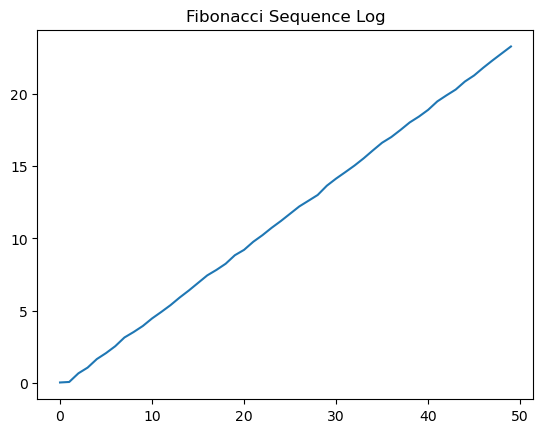

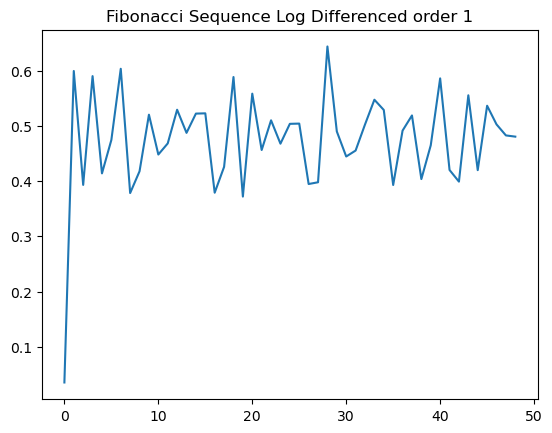

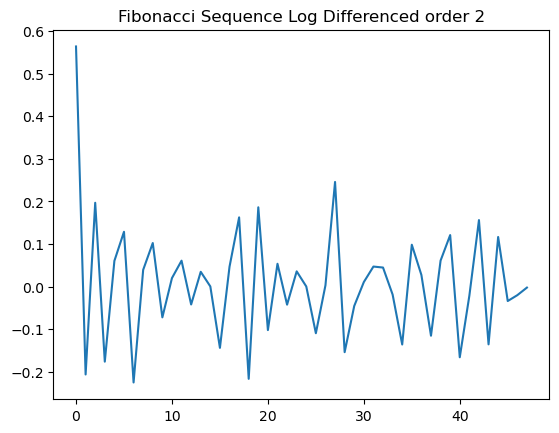

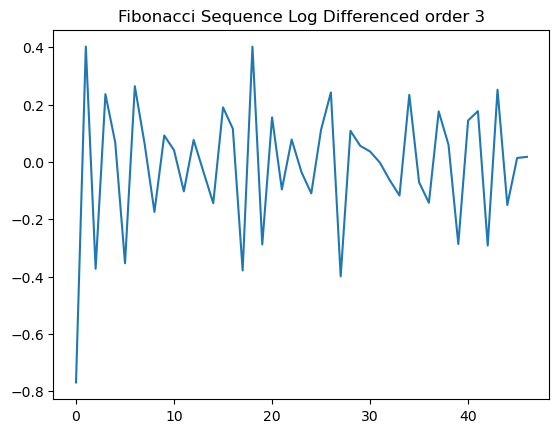

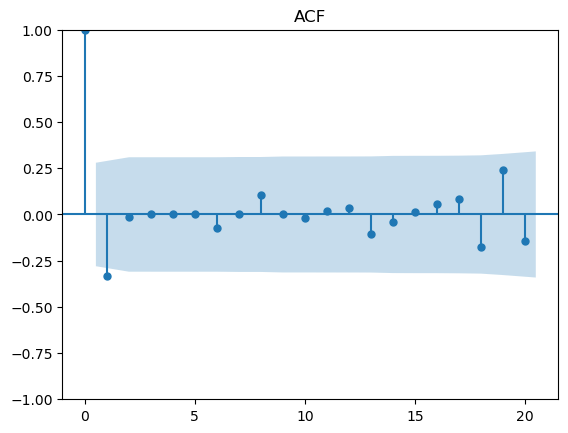

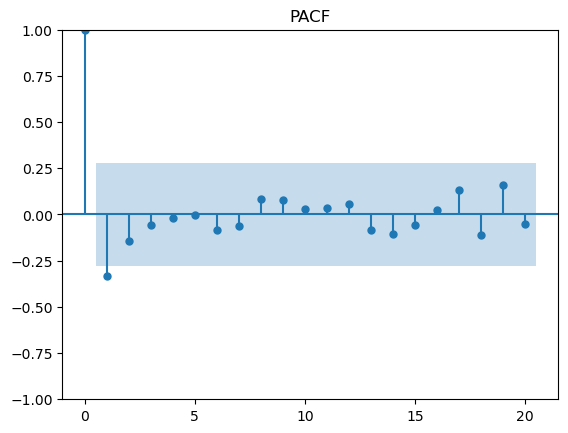

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


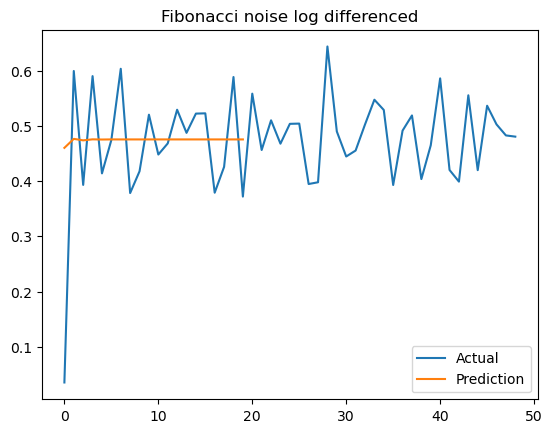

ARIMA
R2 =  -1308.3508640395355
MAE =  0.08441650130812488
MSE =  0.014657848576240038
MAPE =  0.17909155104879346
p-value:  0.00017211773658939446
ADF Test: p value is < 0.05. Thus the data is stationary
p-value:      lb_stat  lb_pvalue
1  7.603753   0.005825
IIISSSUUUUUEEEEEE
Ljung-Box test: p value is greater than 0.05. Thus the data is random
Mean:  0.03429954230309195
Variance:  0.011432984299464797
Standard deviation:  0.10692513408672816


In [89]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima

# To determine ARIMA (p,d,q) properties:

# Data is non-stationary. Modify input data for better visualisation
fib_sequence_noise_log = np.log(fib_sequence_noise)

# Plot data for visual inspection
plt.figure()
plt.savefig('plots/FibSeq_Log.png')
plt.title("Fibonacci Sequence Log")
plt.plot(fib_sequence_noise_log)

# ADF test to check if data is stationary
# p should be < 0.5 is stationary
result_adf = adfuller(fib_sequence_noise_log, autolag='AIC')
p_value = result_adf[1]
print("p_value = ", p_value)

# From log transformation of data, Linear trend detected. order-1 differencing applied to remove trend
fib_sequence_noise_log_diff = np.diff(fib_sequence_noise_log,1)

# Plot data for visual inspection
plt.figure()
plt.savefig('plots/FibSeq_Log_Diff1.png')
plt.title("Fibonacci Sequence Log Differenced order 1")
plt.plot(fib_sequence_noise_log_diff)

# ADF test to check if data is stationary
# p should be < 0.5 is stationary
result_adf = adfuller(fib_sequence_noise_log_diff, autolag='AIC')
p_value = result_adf[1]
print("p_value = ", p_value)
'''
# Difference by order 2 now
fib_sequence_noise_log_diff2 = np.diff(fib_sequence_noise_log,2)

# Plot data for visual inspection
plt.figure()
plt.savefig('plots/FibSeq_Log_Diff2.png')
plt.title("Fibonacci Sequence Log Differenced order 2")
plt.plot(fib_sequence_noise_log_diff2)

# ADF test to check if data is stationary
# p should be < 0.5 is stationary
result_adf = adfuller(fib_sequence_noise_log_diff2)
p_value = result_adf[1]
print(p_value)

# Difference by order 3 now
fib_sequence_noise_log_diff3 = np.diff(fib_sequence_noise_log,3)

# Plot data for visual inspection
plt.figure()
plt.savefig('plots/FibSeq_Log_Diff3.png')
plt.title("Fibonacci Sequence Log Differenced order 3")
plt.plot(fib_sequence_noise_log_diff3)

# ADF test to check if data is stationary
# p should be < 0.5 is stationary
result_adf = adfuller(fib_sequence_noise_log_diff2)
p_value = result_adf[1]
print(p_value)
'''
# Data is stationary

# Plot ACF and PACF graphs to determine p,q values
plot_acf(fib_sequence_noise_log_diff, lags=20)
plt.title('ACF')
plt.show()

plot_pacf(fib_sequence_noise_log_diff, lags=20)
plt.title('PACF')
plt.show()

# p,d,q = 2,1,2

# Create ARIMA model
arima_test_actual = fib_sequence_noise_log_diff[0:20]
arima_model = ARIMA(fib_sequence_noise_log_diff, order=(2,1,2)).fit()
arima_test_predict = arima_model.forecast(steps=len(arima_test_actual))

plt.figure()
plt.savefig('plots/ARIMA_FibSeq.png')
plt.title("Fibonacci noise log differenced")
plt.plot(fib_sequence_noise_log_diff, label = "Actual")
plt.plot(arima_test_predict, label = "Prediction")
plt.legend()
plt.show()

print("ARIMA")
print('R2 = ', r2_score(arima_test_predict, arima_test_actual))
print('MAE = ', mean_absolute_error(arima_test_predict, arima_test_actual))
print('MSE = ', mean_squared_error(arima_test_predict, arima_test_actual))
print('MAPE = ', mean_absolute_percentage_error(arima_test_predict, arima_test_actual))

# Check AIC of model selected
# Should be as low as possible
arima_model.summary()

# Confirm with auto-arima
arima_model = auto_arima(fib_sequence_noise_log_diff, d=1, seasonal=False, information_criterion='aic')

# Check if residual data is white noise
# Get difference of predicted vs actual data
residual_series = arima_model.resid()

# perform adf test to check if data is stationary
result_adf = adfuller(residual_series, autolag='AIC')
print('p-value: ',result_adf[1])
print("ADF Test: p value is < 0.05. Thus the data is stationary")

# perform Ljung-Box test on residuals with lag=1 to check if random
result_lb = sm.stats.acorr_ljungbox(residual_series, lags=[1], return_df=True)
print('p-value: ',result_lb)
print("IIISSSUUUUUEEEEEE")
print("Ljung-Box test: p value is greater than 0.05. Thus the data is random")

# Show data characteristics
print('Mean: ', residual_series.mean())
print('Variance: ', residual_series.var())
print('Standard deviation: ', residual_series.std())

